# PROJECT1:-MEDICAL-INSURANCE COST PREDICTION

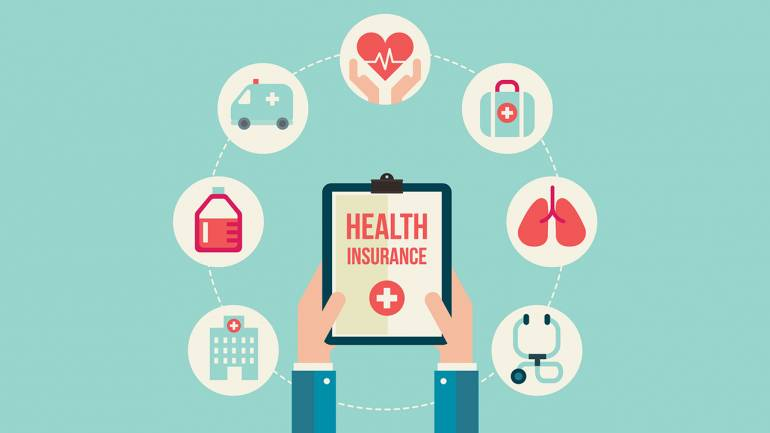

### About this file

The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). 
The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) 
that were converted into factors with numerical value desginated for each level.

The purposes of this exercise to look into different features to observe their relationship, 
and plot a multiple linear regression based on several features of individual such as age, physical/family condition 
and location against their existing medical expense to be used for predicting future medical expenses of individuals that 
help medical insurance to make decision on charging the premium.
Note:This adat set was found from Kaggle



### Variable Description

age : age of primary beneficiary

sex : insurance contractor gender, female, male

bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children : Number of children covered by health insurance / Number of dependents

smoker : Smoking

region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges : Individual medical costs billed by health insurance

In [1033]:
import os
os.chdir(r'C:\Users\Reshma\Desktop\dmasm\notebooks\data')
os.getcwd()

'C:\\Users\\Reshma\\Desktop\\dmasm\\notebooks\\data'

In [1034]:
import warnings
warnings.filterwarnings('ignore')

In [1035]:
#Importing pandas and dataset

import pandas as pd
import numpy as np
import seaborn as sns
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data= pd.read_csv('insurance.csv',na_values='NA')
from scipy.stats import norm


In [1036]:
df=data.copy()

#### Getting fimiliar with data

In [1037]:
print("Dataframe Details")
print("Total Rows: {}\nTotal Columns: {}".format(df.shape[0],df.shape[1]))

Dataframe Details
Total Rows: 1338
Total Columns: 7


In [1038]:
#checking  number of obs and columns ,index of columns, name of columns, number of non_null values and datatype, (memory usage,...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


float64 : bmi, charges

int64 : age, children

object : sex, smoker, region

#### The given dataset has 3 categorical columns  and 4 numerical columns.

In [1039]:
#Checking the head of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [1040]:
#Checking the tail of the dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [1041]:
df.columns   

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### MISSING VALUES

In [1042]:
df.isnull().sum().sort_values(ascending=False)

charges     0
region      0
smoker      0
children    0
bmi         0
sex         0
age         0
dtype: int64

#### It can be seen that there are no missing values in the given dataset

### OUTLIER ANALYSIS

Potential outliers are observations that lie outside the lower and upper limits. 
Lower limit = Q1 - 1.5 * IQR 
Upper limit = Q3 + 1.5 * IQR

In [ ]:
1)lower inner fence: Q1 - 1.5*IQR
2)upper inner fence: Q3 + 1.5*IQR
3)lower outer fence: Q1 - 3*IQR
4)upper outer fence: Q3 + 3*IQR
Data values that lie between the inner and outer fences are considered possible outliers or potential outliers; 
those that lie outside the outer fences are considered probable outliers or extreme outlier

<AxesSubplot:ylabel='children'>

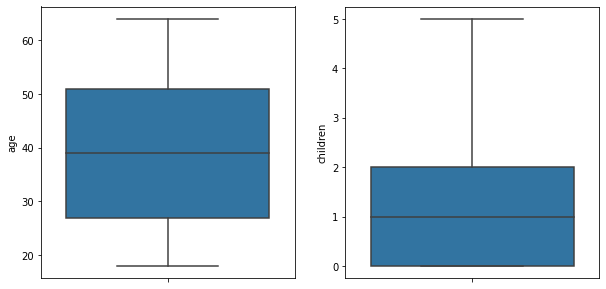

In [1043]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)  
sns.boxplot( y=df['age'] )
plt.subplot(1,2,2)  
sns.boxplot( y=df['children'] )

In [1044]:
print(df['age'].describe())
print(df['children'].describe())

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


### It can be seen that there are no outliers in age and childern columns of the dataset

<AxesSubplot:ylabel='charges'>

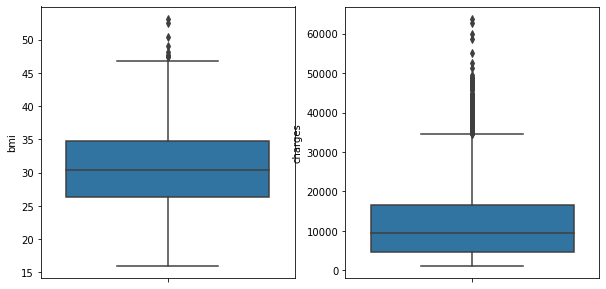

In [1045]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  
sns.boxplot( y=df['bmi'] )
plt.subplot(1,2,2)  
sns.boxplot( y=df['charges'] )

In [1046]:
print(df['bmi'].describe())
print(df['charges'].describe())

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


#### It can be seen that bmi and charges column has potential ouliers which we need to fix .SInce medical expenses are case specific and outliers are normal the ouliers in the charges column is ignored and the only bmi colum is fixed

In [1047]:
#lower inner fence: Q1 - 1.5*IQR
#upper inner fence: Q3 + 1.5*IQR
def outlier_analysis(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)#UIF=upper inner fence
    LIF=Q1-1.5*(IQR) #LIF=lower inner fence
    data_out =df[(df[col]<LIF) | (df[col]>UIF)] # I created a new data set that has just include potential outliers 
    return data_out[col] .describe(),data_out[col],len(data_out)

In [1048]:
bmi_outliers_summary, bmi_outliers,length_bmi = outlier_analysis("bmi")
charge_outliers_summary, charge_outliers,length_charge = outlier_analysis("charges")

In [1049]:
bmi_outliers=bmi_outliers.values.tolist()
charge_outliers=charge_outliers.values.tolist()

In [1050]:
bmi_outliers

[49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]

In [1051]:
#Removing the outliers of bmi 
for num, i in enumerate(df['bmi']):
    if i in bmi_outliers:
        df['bmi'][num] =df.bmi.median()


<AxesSubplot:ylabel='bmi'>

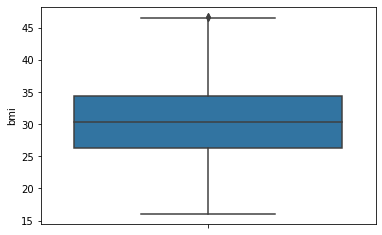

In [1052]:
sns.boxplot( y=df['bmi'] )

In [1053]:
df['bmi'].describe()

count    1338.000000
mean       30.536424
std         5.899998
min        15.960000
25%        26.296250
50%        30.400000
75%        34.430000
max        46.750000
Name: bmi, dtype: float64

In [1054]:
#bmi_outliers_summary, bmi_outliers,length_bmi = outlier_analysis("bmi")
charge_outliers_summary, charge_outliers,length_charge = outlier_analysis("charges")
#bmi_outliers=bmi_outliers.values.tolist()
charge_outliers=charge_outliers.values.tolist()

In [1055]:
charge_outliers_summary

count      139.000000
mean     42103.947206
std       5582.168107
min      34617.840650
25%      37786.149950
50%      40974.164900
75%      45786.706425
max      63770.428010
Name: charges, dtype: float64

### Univariate Analysis

In this section, we will visualize all the features one by one and will be interpreted.

Age

Sex

Bmi

Children

Smoker

Region

Charges

#### -SEX

In [1056]:
GC=df['sex'].value_counts()
GC

male      676
female    662
Name: sex, dtype: int64

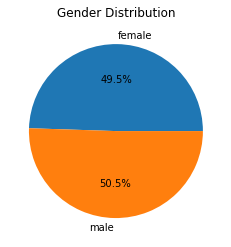

In [1057]:
data1 = df.groupby(['sex']).sex.count()
data1.plot.pie(title="Gender Distribution",autopct='%1.1f%%')
plt.ylabel(None)
plt.show()

#### INTERPRETATION:-
    It can be seen that in the given dataset we have 49.5% of females and 50.5% of males

#### -SMOKER

In [1058]:
SC=df['smoker'].value_counts()
SC

no     1064
yes     274
Name: smoker, dtype: int64

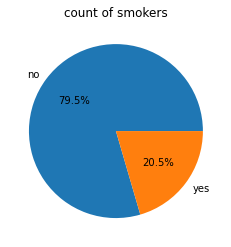

In [1059]:
data = df.groupby(['smoker']).smoker.count()
data.plot.pie(title="count of smokers",autopct='%1.1f%%')
plt.ylabel(None)
plt.show()

#### -INTERPRETATION:
    It can be seen that in the given data set we have 79.5% of non smokers and 20.5% of smokers.

#### -REGION

In [1060]:
RC=df['region'].value_counts()
RC

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0.5, 1, 'Bar chart for Region Distribution')

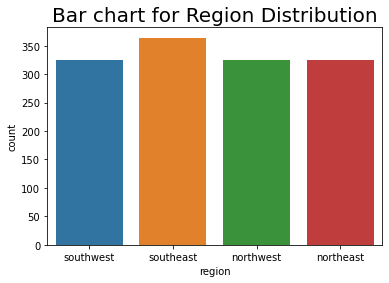

In [1061]:
#countplot
sns.countplot(df['region'])
plt.title("Bar chart for Region Distribution", y=1, fontdict={"fontsize": 20})


#### Interpreataion:
    Most number of people belong to the southeast region and all other regions has almost same number of people
    

In [1062]:
data_categorical=df[['sex', 'region', 'smoker']]

In [1063]:
data_categorical

,sex,region,smoker
0,female,southwest,yes
1,male,southeast,no
2,male,southeast,no
3,male,northwest,no
4,male,northwest,no
...,...,...,...
1333,male,northwest,no
1334,female,northeast,no
1335,female,southeast,no
1336,female,southwest,no


In [1064]:
data_num=df[['age']]

Text(0.5, 1.0, 'age')

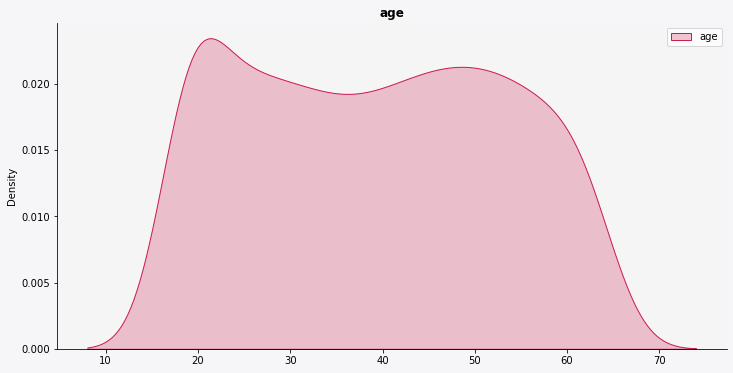

In [1159]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(data=data_num,shade=True,palette='rocket') # Distributions
# removing spines
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('age',weight='bold')

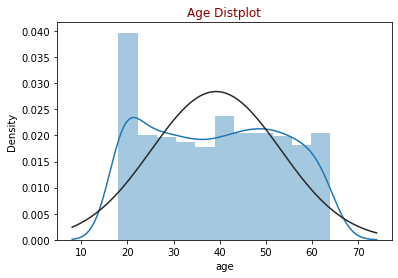

In [1066]:
sns.distplot(df["age"], fit=norm)
plt.title("Age Distplot", color = "darkred")

plt.show()

### Interpretation-
In the last graph, we see the distribution of age characteristics according to the normal distribution. In fact, there does not seem to be a big difference with the normal distribution, but it can still be corrected.

### -BMI

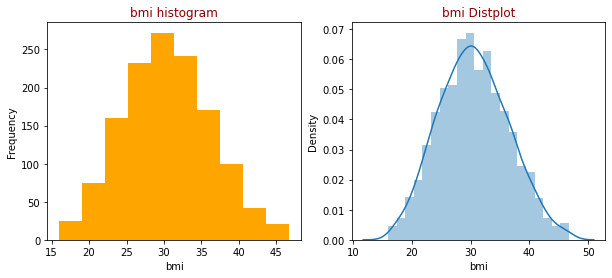

In [1067]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df["bmi"], color="orange")
plt.xlabel("bmi")
plt.ylabel("Frequency")
plt.title("bmi histogram", color = "darkred")
plt.subplot(1,2,2)
sns.distplot(df["bmi"])
plt.title("bmi Distplot", color = "darkred")

plt.show()

### -Interpretation
In the first graph we look at the distribution of bmi.

We can see from the first graph that it actually has a nice distribution. We supported this with the second chart. Almost the same as the normal distribution. So there is no need to do anything here.

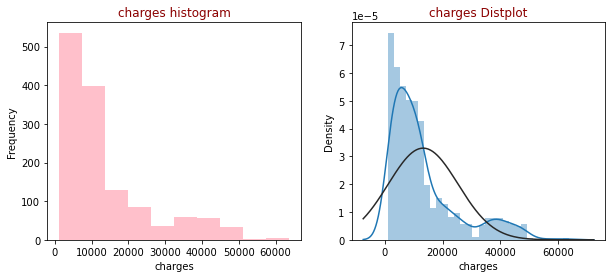

In [1068]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df["charges"], color="pink")
plt.xlabel("charges")
plt.ylabel("Frequency")
plt.title("charges histogram", color = "darkred")
plt.subplot(1,2,2)
sns.distplot(df["charges"], fit=norm)
plt.title("charges Distplot", color = "darkred")

plt.show()

### INTERPRETATION-

Charges is heavily skewed towards right and most of the distribution is between 0-20000.

### -BUSINESS QUESTIONS

charges     0
region      0
smoker      0
children    0
bmi         0
sex         0
age         0

#Q1:is there any relation between sex and charges?

We are interested in knowing if there is a relationship between charges and sex. In order to do so, we would have to use the t-test. But first, let's state our null hypothesis and the alternative hypothesis.

H0:There is no statistically significant relationship between sex and charges

Ha:There is a statistically significant relationship between sex and charges

Continouse Vs. Categorical  : For summaraization:gropup by categorical column an aggragte for numerical column
                                For visualization: Grouped box plot,...
                                For test of independence :1) if categorical column has only two levels :t-test
                                                          2) if categorical column has more than two levels: ANOVA

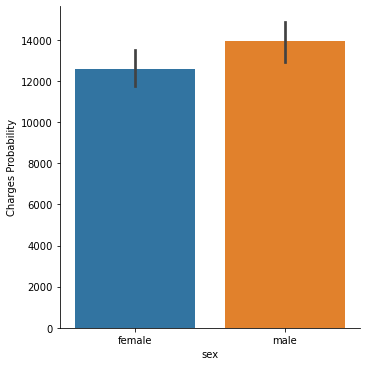

In [1069]:
g = sns.factorplot(x = "sex", y = "charges", data = df, kind = "bar")
g.set_ylabels("Charges Probability")
plt.show()

### -INTERPRETATION
 From the above chart we can see that charges are higher for males compared to females.

In [1070]:
import scipy
from scipy.stats import ttest_ind

In [1071]:
male_charges = df[df['sex'] == 'male']['charges']
female_charges = df[df['sex'] == 'female']['charges']
stats.ttest_ind(male_charges, female_charges) 

Ttest_indResult(statistic=2.097546590051688, pvalue=0.03613272100592976)

### Interpretation:
    Here the p value is 0.03 which is less than .05,therefore we reject the null hypothesis at 5% significance level .There is a statistically significant relationship between sex and charges.Which means gender impacts the medical insurance cost.

#Q2:is there any relation between smoker(smoking status) and charges?

We are interested in knowing if there is a relationship between charges and smoking status. 
In order to do so, we would have to use the t-test. But first, let's state our null hypothesis and the alternative hypothesis.

H0:There is no statistically significant relationship between smoking status and charges

Ha:There is a statistically significant relationship between smoking status and charges

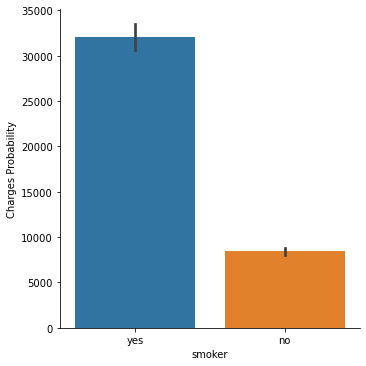

In [1072]:
g = sns.factorplot(x = "smoker", y = "charges", data = df, kind = "bar")
g.set_ylabels("Charges Probability")
plt.show()

#### -INTERPRETATION
From the above chart we can see that charges are higher for smokers compared to non-smokers.

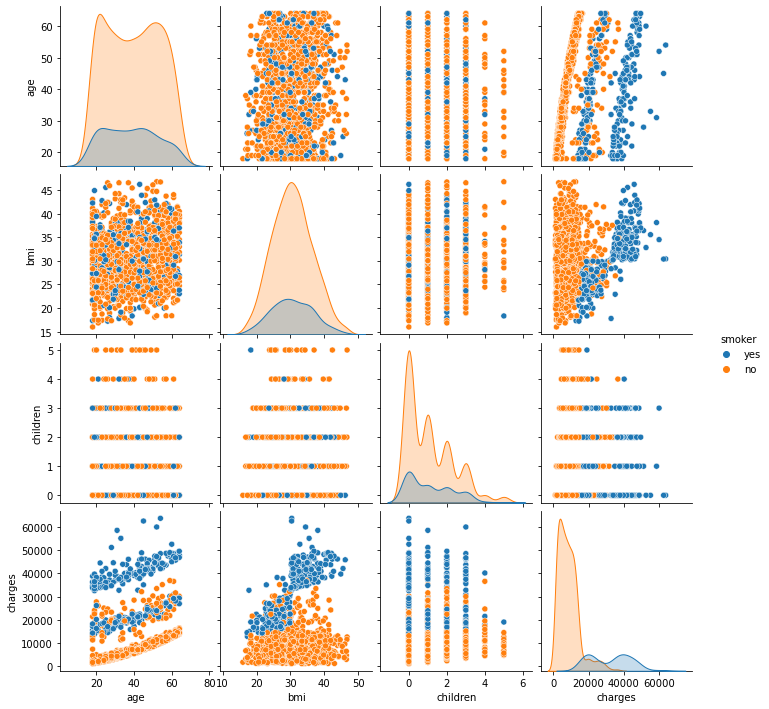

In [1073]:
# Look at various pairings of variables to see if there are any other patterns not identified yet
sns.pairplot(data=df,hue='smoker')

### Observations:
Smoking has a very large impact on expenses (bmi vs expenses) Age also has a positive correlation with expenses (age vs expenses) Number of children seems to have very little effect (children vs expenses)

In [1074]:
yes_charges = df[df['smoker'] == 'yes']['charges']
no_charges = df[df['smoker'] == 'no']['charges']
stats.ttest_ind(yes_charges, no_charges) 

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

### Interpretation:
Here the p value is 8.271435842177219e-283 which is less than .05,therefore we reject the null hypothesis at 5% significance level .There is a statistically significant relationship between smoking status and charges.Which means smoking status impacts the medical insurance cost.

#Q3:is there any relation between region and charges?

We are interested in knowing if there is a relationship between charges and region. 
In order to do so, we would have to use the anova test(as we have more than two levels in this column). 

But first, let's state our null hypothesis and the alternative hypothesis.

H0:There is no statistically significant relationship between region and charges

Ha:There is a statistically significant relationship between region and charges

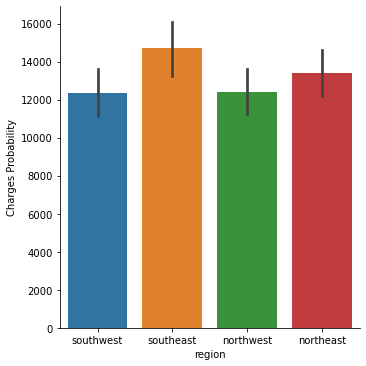

In [1075]:
g = sns.factorplot(x = "region", y = "charges", data = df, kind = "bar")
g.set_ylabels("Charges Probability")
plt.show()

### -INTERPREATION
from the above figure it can be observed that southeast region follwed by northeast region has the highest insurace costs.

In [1076]:
southwest_charges = df[df['region'] == 'southwest']['charges']
southeast_charges = df[df['region'] == 'southeast']['charges']
northwest_charges = df[df['region'] == 'northwest']['charges']
northeast_charges = df[df['region'] == 'northeast']['charges']

In [1077]:
from scipy.stats import f_oneway
#perform oANOVA
f_oneway(southwest_charges, southeast_charges,northwest_charges,northeast_charges)

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

#### Interpretation:
Here the p value is 0.0308 which is less than .05,therefore we reject the null hypothesis at 5% significance level .There is a statistically significant relationship between region and charges.Which means region impacts the medical insurance cost.

#Q4:is there any relation between bmi and charges?

We are interested in knowing if there is a relationship between charges and bmi. 
In order to do so, we would have to use the pearson correlation or spearman. 

But first, let's state our null hypothesis and the alternative hypothesis.

H0:There is no statistically significant relationship between bmi and charges

Ha:There is a statistically significant relationship between bmi and charges

Text(-9.075000000000003, 0.5, 'Charges')

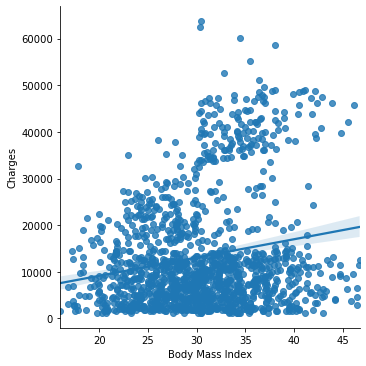

In [1079]:
sns.lmplot(x = 'bmi', y = 'charges',data = df)
plt.xlabel("Body Mass Index")
plt.ylabel("Charges")

In [1080]:
x=df['bmi']
y=df['charges']
#r = np.corrcoef(x, y)
import scipy
pvalue = scipy.stats.pearsonr(x, y)
pvalue

(0.19064036229423068, 2.044161908601384e-12)

In [1081]:
# calculate spearman's correlation
coef, p = scipy.stats.spearmanr(x, y)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.118
Samples are correlated (reject H0) p=0.000


#### Interpretation:
Here the p value is 0 which is less than .05,therefore we reject the null hypothesis at 5% significance level .There is a statistically significant relationship between bmi and charges.Which means bmi impacts the medical insurance cost.

#Q5:is there any relation between age and charges?

We are interested in knowing if there is a relationship between charges and age. 
In order to do so, we would have to use the pearson correlation or spearman. 

But first, let's state our null hypothesis and the alternative hypothesis.

H0:There is no statistically significant relationship between age and charges

Ha:There is a statistically significant relationship between age and charges

Text(-9.075000000000003, 0.5, 'Charges')

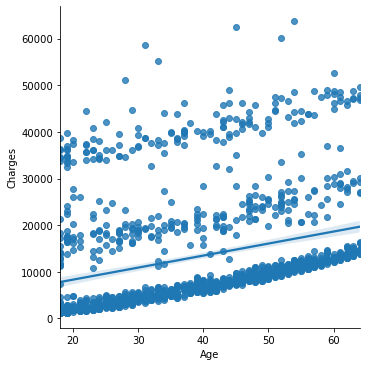

In [1083]:
sns.lmplot(x = 'age', y = 'charges',data = df)
plt.xlabel("Age")
plt.ylabel("Charges")

In [1084]:
x=df['age']
y=df['charges']
#r = np.corrcoef(x, y)
import scipy
pvalue = scipy.stats.pearsonr(x, y)
pvalue

(0.29900819333064765, 4.8866933317203816e-29)

In [1085]:
# calculate spearman's correlation
coef, p = scipy.stats.pearsonr(x, y)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.299
Samples are correlated (reject H0) p=0.000


#### Interpretation:
Here the p value is 0 which is less than .05,therefore we reject the null hypothesis at 5% significance level .There is a statistically significant relationship between age and charges.Which means age impacts the medical insurance cost.

#### Q5:is there any relation between number of children and charges?

We are interested in knowing if there is a relationship between charges and no of children the policy holder has. 
In order to do so, we would have to use the pearson correlation or spearman. 

But first, let's state our null hypothesis and the alternative hypothesis.

H0:There is no statistically significant relationship between no of children and charges

Ha:There is a statistically significant relationship between no of children and charges

Text(-9.075000000000003, 0.5, 'Charges')

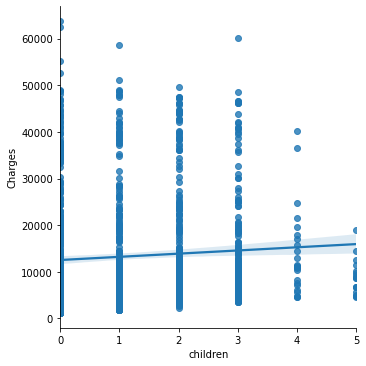

In [1086]:
sns.lmplot(x = 'children', y = 'charges',data = df)
plt.xlabel("children")
plt.ylabel("Charges")

In [1087]:
x=df['children']
y=df['charges']
#r = np.corrcoef(x, y)
import scipy
pvalue = scipy.stats.pearsonr(x, y)
pvalue

(0.06799822684790482, 0.012852128520141125)

In [1088]:
from scipy.stats import spearmanr

In [1089]:
# calculate spearman's correlation
coef, p = spearmanr(x, y)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.133
Samples are correlated (reject H0) p=0.000


#### Interpretation:
Here the p value is 0 which is less than .05,therefore we reject the null hypothesis at 5% significance level .There is a statistically significant relationship between no of children and charges.Which means no of children impacts the medical insurance cost.

### Label Encoding

In [1090]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(df["sex"].value_counts())
print("---"*30)
df['sex'] = le.fit_transform(df['sex'])
print(df["sex"].value_counts())
print("---"*30)
print(df["smoker"].value_counts())
print("---"*30)
df['smoker'] = le.fit_transform(df['smoker'])
print(df["smoker"].value_counts())
print("---"*30)
#print(df["region"].value_counts())
#print("---"*30)
#df['region'] = le.fit_transform(df['region'])
#print(df["region"].value_counts())
#print("---"*30)

male      676
female    662
Name: sex, dtype: int64
------------------------------------------------------------------------------------------
1    676
0    662
Name: sex, dtype: int64
------------------------------------------------------------------------------------------
no     1064
yes     274
Name: smoker, dtype: int64
------------------------------------------------------------------------------------------
0    1064
1     274
Name: smoker, dtype: int64
------------------------------------------------------------------------------------------


In [1091]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [1093]:
#Dummy variable encoding for both Sex and Embarked variable 
df = pd.get_dummies(df,columns=['region'],drop_first=True)

In [1095]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [1096]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int32  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int32  
 5   charges           1338 non-null   float64
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int32(2), int64(2), uint8(3)
memory usage: 56.3 KB


In [1097]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


### It can be seen that all the categorical columns are converted to numerical columns¶

## CORRELATION

#### A correlation matrix is simply a table which displays the correlation. The measure is best used in variables that demonstrate a linear relationship between each other.

In [1098]:
dtcr = df.drop(['charges'],axis=1)

In [1105]:
print(dtcr.corr())

                       age       sex       bmi  children    smoker  \
age               1.000000 -0.020856  0.114277  0.042469 -0.025019   
sex              -0.020856  1.000000  0.039773  0.017163  0.076185   
bmi               0.114277  0.039773  1.000000  0.017358 -0.002906   
children          0.042469  0.017163  0.017358  1.000000  0.007673   
smoker           -0.025019  0.076185 -0.002906  0.007673  1.000000   
region_northwest -0.000407 -0.011156 -0.128369  0.024806 -0.036945   
region_southeast -0.011642  0.017117  0.253808 -0.023066  0.068498   
region_southwest  0.010016 -0.004184  0.000698  0.021914 -0.036945   

                  region_northwest  region_southeast  region_southwest  
age                      -0.000407         -0.011642          0.010016  
sex                      -0.011156          0.017117         -0.004184  
bmi                      -0.128369          0.253808          0.000698  
children                  0.024806         -0.023066          0.021914  
smok

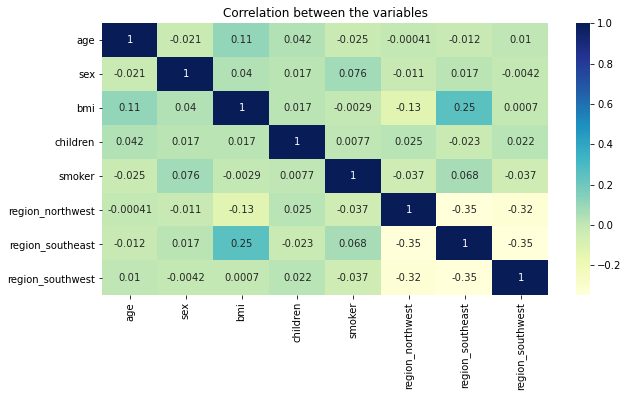

In [1104]:
# Heatmap to visualise the correlation between the variables

plt.figure(figsize=(10, 5))
sns.heatmap(dtcr.corr(), cmap="YlGnBu", annot = True)
plt.title("Correlation between the variables")
plt.show()

##### -INTERPRETATION

From the above heatmap it can be seen that there is no strong correlation beteen variables

#### Shuffling Data
There is a crucial assumption made by any supervised ML approach: both the training set and the set are samples drawn from the same population. This means that the model expects to see the same distribution of features in the test set as in the training set.In order to make sure that this assumption is satisfied, it is important to shuffle the instances before splitting between training set and test set. This will avoid any visible or invisible bias due to the order in which the data was collected or assembled. from sklearn.utils import shuffle

In [1106]:
# shuffle the dataframe
from sklearn.utils import shuffle
df = shuffle(df, random_state=0)
print(df.head())

      age  sex     bmi  children  smoker      charges  region_northwest  \
578    52    1  30.200         1       0   9724.53000                 0   
610    47    0  29.370         1       0   8547.69130                 0   
569    48    1  40.565         2       1  45702.02235                 1   
1034   61    1  38.380         0       0  12950.07120                 1   
198    51    0  18.050         0       0   9644.25250                 1   

      region_southeast  region_southwest  
578                  0                 1  
610                  1                 0  
569                  0                 0  
1034                 0                 0  
198                  0                 0  


In [1160]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
578,52,1,30.200,1,0,9724.53000,0,0,1
610,47,0,29.370,1,0,8547.69130,0,1,0
569,48,1,40.565,2,1,45702.02235,1,0,0
1034,61,1,38.380,0,0,12950.07120,1,0,0
198,51,0,18.050,0,0,9644.25250,1,0,0


#### Dividing into features and target variable

In [1107]:
#Packaging the independent variables into X Dataframe
X = df.drop(['charges'],axis=1)
#Packaging the independent variables into y Dataframe
y = df.charges

In [1108]:
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
578,52,1,30.200,1,0,0,0,1
610,47,0,29.370,1,0,0,1,0
569,48,1,40.565,2,1,1,0,0
1034,61,1,38.380,0,0,1,0,0
198,51,0,18.050,0,0,1,0,0


In [1015]:
y.head()

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
Name: charges, dtype: float64

# MODELLING

### StatsModel API helps to create a linear regression model as it gives a comprehensive report of how good a fit your linear regression model is.


In [1109]:
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.params)
print(lr.summary())

const              -11930.926054
age                   256.762798
sex                  -101.647679
bmi                   339.242166
children              469.396705
smoker              23870.793428
region_northwest     -369.995186
region_southeast     -929.342849
region_southwest     -959.392527
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     496.9
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:13:41   Log-Likelihood:                -13552.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1329   BIC:                         2.717e+04
Df Model:                           8                   

#### Here we have all P values greater than .05 in columns that indicates it is an irrelanat feature and we need to do backward feature elimination on that.

In [1110]:
#backward feature elimination
while (lr.pvalues.max()>0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True)
    ols = sm.OLS(y,X2)
    lr = ols.fit()
print(lr.params)
print(lr.summary())

const      -12125.526341
age           257.600007
bmi           324.282499
children      466.768198
smoker      23843.345284
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     991.1
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:15:27   Log-Likelihood:                -13555.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1333   BIC:                         2.715e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

All the p values for are less than .05 now.

### OLS SUMMARY-INTERPRETATION

### Cooefficient of determination,R squared value and Adjusted R squared value

Cooefficient of determination is the proportion of the variance in dependend variable that can be predicted from independed variable.Adjusted R2 also indicates how well terms fita curve or line, but adjusts for the number of terms in a model. If you add more and more useless variablesto a model, adjusted r-squared will decrease.R-squared is a statistical measure of how close the data are to the fitted regression line.

Note:----->In general, the higher the R-squared, the better the model fits your data,Here we have 74% as value for R^2 and Adjusted R^2.
    Approximately 73% of the variation in the charges can be explained by the variation in the independed variables using the best-fit regression line.

### t-test Section
t-test section helps to find if there is any multicolinearity(Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.) among the features or can you drop any of the variables after creating the model.

Note:----->Since we had attribute  with a p value greater than .05 we dropped that using backward feature elimanation and it can be observed in the second OLS model that all the p values are less than or equal to 0.05,which indicates our datset contains only relevant eatures now and there is no multlicolinearity

## Spliting Dataset into train and test data

In [1134]:
from sklearn.model_selection import train_test_split
#we do not need the constant cloumn for the linear regression mdel so we need to drop that from dataset X2.
X2 = X2.drop(['const'],axis=1)
x_train , x_test , y_train , y_test = train_test_split(X2, y, test_size = 0.2 , random_state =0)

# Linear Regression Model Training

In [1113]:
from sklearn.linear_model import LinearRegression
#Create Model & Fit

lr = LinearRegression() 
lr.fit(x_train, y_train)

LinearRegression()

In [1114]:
print("Intercept : " , lr.intercept_)#B0
print("Slope : " , lr.coef_)#B1

Intercept :  -12596.599780491175
Slope :  [  263.74915224   329.42367957   404.64301526 23903.96782308]


#### Here we have one model intercept and 5 coefficients,number of coeffients is five because i have 5 attributes in the dataset.

### K-FOLD CROSS VALIDATION

In [1135]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X,y,cv=5).mean()

0.7386587699127443

### Interpretation
Cross-validation is a statistical method used to estimate the skill of machine learning models.It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.Here we have a cross validation score of 74% percentage which shows the model is suited for the given data but there is room for improvement

#### Prediction

In [1116]:
y_pred = lr.predict(x_test)
y_pred_data = pd.DataFrame(y_pred, columns=["Predicted Values" ])
y_test_data = pd.DataFrame(np.array(y_test), columns=["Real Values"])
pd.concat([y_test_data , y_pred_data] , axis=1)

,Real Values,Predicted Values
0,4347.02335,5813.170545
1,8240.58960,10956.432083
2,1704.70015,-244.369397
3,11394.06555,13924.784194
4,4058.11610,8145.620676
...,...,...
263,3309.79260,2914.079921
264,8124.40840,12140.241829
265,19496.71917,11334.606925
266,20167.33603,23763.787302


Text(0.5, 1.0, 'Observed Vs, Predicted Values')

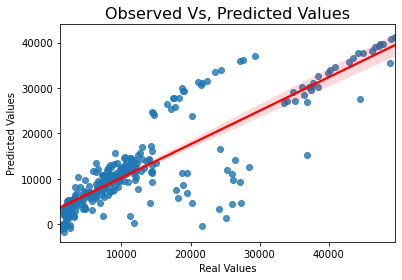

In [1117]:

sns.regplot(x=y_test_data,y=y_pred_data,line_kws={'color':'red'})
plt.title('Observed Vs, Predicted Values',fontsize=16)

In [1118]:
n=len(x_test)
k=len(x_test.iloc[0])

In [1120]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
score = r2_score(y_test , y_pred)
lr_r2=score
Adj_R2=1-((n-1)*(1-score)/(n-k-1))
lr_adjr2=Adj_R2
print("R2 Score : {}".format(score))
print("Adj_R2 : {}".format(Adj_R2))
print("Model Accuracy: {}%".format(score * 100))
mae=mean_absolute_error(y_test,y_pred)
lr_mae=mae
print("mae : {}".format(mae)) # mae = mean(|y_pred - y_test|)
mse =mean_squared_error(y_test,y_pred)
lr_mse=mse
print("mse : {}".format(mse)) # mse = mean[(y_pred - y_test)^2]
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
lr_rmse=rmse
print("rmse : {}".format(rmse))


R2 Score : 0.7183667845780498
Adj_R2 : 0.7140833896666894
Model Accuracy: 71.83667845780498%
mae : 4266.013116043588
mse : 39464937.072760336
rmse : 6282.112468967771


<AxesSubplot:title={'center':'Model Coefficients'}>

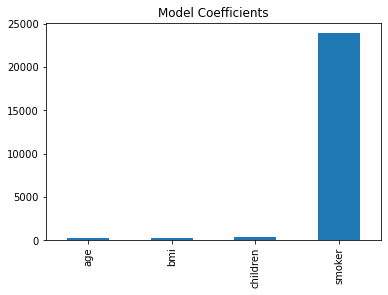

In [1140]:
coef1 = pd.Series(lr.coef_, x_train.columns).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

#### INTERPRETATION

R2Score and Adj_R2 shows though our model is not a very good fit for the data it is a decent enough model to predictthe
independ variable

mse : 39464937.07-->The mean squared error tells you how close a regression line is to a set of points.
The smaller the means squared error,the closer you are to finding the line of best fit

rmse : 6282.11-->Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). 
Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how
spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit

#### Interpretations

We have arrived at a conclusion that our model is not a very well fitted model for predictiong the medical insurance charges with the significant variables.




### KNN

In [1121]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [1122]:
y_pred = knn.predict(x_test)

In [1123]:
knn.score(x_test,y_test)

0.19880205703300158

In [1124]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
score = r2_score(y_test , y_pred)
knn_r2=score
Adj_R2=1-((n-1)*(1-score)/(n-k-1))
knn_adj2=Adj_R2
print("R2 Score : {}".format(score))
print("Adj_R2 : {}".format(Adj_R2))
print("Model Accuracy: {}%".format(score * 100))
mae=mean_absolute_error(y_test,y_pred)
print("mae : {}".format(mae)) # mae = mean(|y_pred - y_test|)
mse =mean_squared_error(y_test,y_pred)
print("mse : {}".format(mse)) # mse = mean[(y_pred - y_test)^2]
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
knn_rmse=rmse
print("rmse : {}".format(rmse))

R2 Score : 0.19880205703300158
Adj_R2 : 0.18661653698787617
Model Accuracy: 19.880205703300156%
mae : 7572.750468078358
mse : 112270942.02878332
rmse : 10595.79831955966


In [1125]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
params = {
            'n_neighbors': [2,3,4,5,6,7,8,9,10,20,30,40],
            'weights':['uniform', 'distance'],
            'metric' :['euclidean','manhattan']
        }
knn_model = GridSearchCV(KNeighborsRegressor(), params,cv=4)
knn_model.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30,
                                         40],
                         'weights': ['uniform', 'distance']})

In [1126]:
knn_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}

In [1127]:
knn_model.best_score_

0.3617511289337809

In [1128]:
best_model_knn = knn_model.best_estimator_

In [1129]:
best_model_knn.fit(x_train,y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=8, weights='distance')

In [1130]:
y_pred = best_model_knn.predict(x_test)

In [1131]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
score = r2_score(y_test , y_pred)
knn_r2=score
Adj_R2=1-((n-1)*(1-score)/(n-k-1))
knn_adjr2=Adj_R2
print("R2 Score : {}".format(score))
print("Adj_R2 : {}".format(Adj_R2))
print("Model Accuracy: {}%".format(score * 100))
mae=mean_absolute_error(y_test,y_pred)
print("mae : {}".format(mae)) # mae = mean(|y_pred - y_test|)
mse =mean_squared_error(y_test,y_pred)
print("mse : {}".format(mse)) # mse = mean[(y_pred - y_test)^2]
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
knn_rmse=rmse
print("rmse : {}".format(rmse))

R2 Score : 0.37027894904969305
Adj_R2 : 0.3607014425713614
Model Accuracy: 37.02789490496931%
mae : 6285.011134774674
mse : 88242083.27811264
rmse : 9393.725739987975


#### INTERPRETATION
R2Score and Adj_R2,which are .37 and .38 which shows our model is not a very good fit for the data and it can not predict the independ variable

We have arrived at a conclusion that our model is a not well fitted model for predictiong the insurance charges with the significant variables.

### SVR

In [735]:
from sklearn.svm import SVR

In [736]:
params_dictionary = {
                        'C' : [95,100,110],
                        'kernel': ['linear','rbf'],
                        'degree': [2,3],
                        'gamma' : [0.1,1,10]
                    }

SVR_model = GridSearchCV(SVR(),param_grid=params_dictionary,cv=5)

In [737]:
SVR_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [95, 100, 110], 'degree': [2, 3],
                         'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [738]:
SVR_model.best_params_

{'C': 110, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}

In [739]:
SVR_model.best_score_

0.5342367975225508

In [740]:
SVR_model=SVR_model.best_estimator_

In [741]:
SVR_model.score(x_test,y_test)

0.5044509966159683

In [742]:
y_pred = SVR_model.predict(x_test)

In [743]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
score = r2_score(y_test , y_pred)
svr_r2=score
Adj_R2=1-((n-1)*(1-score)/(n-k-1))
svr_adjr2=Adj_R2
print("R2 Score : {}".format(score))
print("Adj_R2 : {}".format(Adj_R2))
print("Model Accuracy: {}%".format(score * 100))
mae=mean_absolute_error(y_test,y_pred)
print("mae : {}".format(mae)) # mae = mean(|y_pred - y_test|)
mse =mean_squared_error(y_test,y_pred)
print("mse : {}".format(mse)) # mse = mean[(y_pred - y_test)^2]
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
svr_rmse=rmse
print("rmse : {}".format(rmse))

R2 Score : 0.5044509966159683
Adj_R2 : 0.496914129644348
Model Accuracy: 50.44509966159683%
mae : 4176.053856455707
mse : 69440709.27755943
rmse : 8333.109220306633


#### INTERPRETATION
R2Score and Adj_R2,which are .50,.49 which shows our model is not a good fit for the data and it can not accurately predict the independ variable

Overall we have a model with a model accuracy of 50.4% after parameter tuning which is a good score for the model.

We have arrived at a conclusion that our model is not a well fitted model for predictiong themedical insurance charges with the significant variables.

### DECISION TREE

<AxesSubplot:title={'center':'Feature Importances'}>

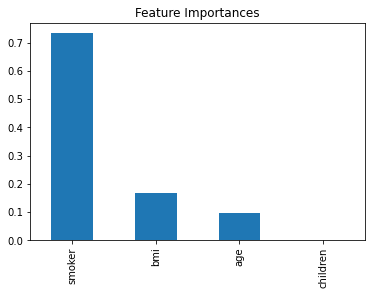

In [1147]:
from sklearn.tree import DecisionTreeRegressor
predictors = x_train.columns
dt_model = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
dt_model.fit(x_train, y_train)
coef3 = pd.Series(dt_model.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

In [1148]:
y_pred = model.predict(x_test)

In [1149]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
score = r2_score(y_test , y_pred)
dt_r2=score
Adj_R2=1-((n-1)*(1-score)/(n-k-1))
dt_adjr2=Adj_R2
print("R2 Score : {}".format(score))
print("Adj_R2 : {}".format(Adj_R2))
print("Model Accuracy: {}%".format(score * 100))
mae=mean_absolute_error(y_test,y_pred)
print("mae : {}".format(mae)) # mae = mean(|y_pred - y_test|)
mse =mean_squared_error(y_test,y_pred)
print("mse : {}".format(mse)) # mse = mean[(y_pred - y_test)^2]
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
dt_rmse=rmse
print("rmse : {}".format(rmse))

R2 Score : 0.8048352751053142
Adj_R2 : 0.8018669903160414
Model Accuracy: 80.48352751053142%
mae : 3166.6045152863962
mse : 27348207.40249611
rmse : 5229.55135766885


#### INTERPRETATION
R2Score and Adj_R2,which are .804 which shows our model is not a good fit for the data and it can not accurately predict the independ variable

Overall we have a model with a model accuracy of 80.4% after parameter tuning which is a good score for the model.

We have arrived at a conclusion that our model is not a well fitted model for predictiong themedical insurance charges with the significant variables.

### RANDOM FOREST

In [744]:
from sklearn.ensemble import RandomForestRegressor

#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,201,10):
    scores.append(cross_val_score(RandomForestRegressor(n_estimators=i,random_state=0),
                                  x_train,y_train,cv=4).mean())

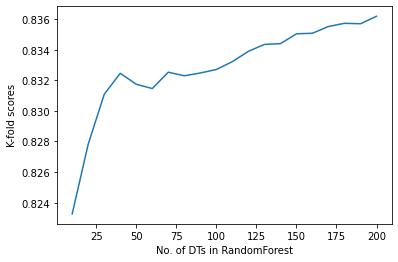

In [745]:
plt.plot(range(10,201,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

In [746]:
#including other params like max_depth, we will apply gridsearch to fine the best settings for the RF
params = {
            'n_estimators': [50,200,210,215,220,225],
            'max_depth': [20,25,30,35],
        }
model = GridSearchCV(RandomForestRegressor(), params,cv=4)
model.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 25, 30, 35],
                         'n_estimators': [50, 200, 210, 215, 220, 225]})

In [747]:
model.best_params_

{'max_depth': 25, 'n_estimators': 200}

In [748]:
model.best_score_

0.8384419030893492

In [749]:
best_model_rf = model.best_estimator_

In [750]:
best_model_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=25, n_estimators=200)

In [751]:
y_pred = best_model_rf.predict(x_test)

<AxesSubplot:title={'center':'Feature Importances'}>

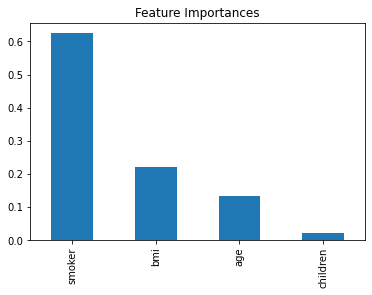

In [1137]:
coef4 = pd.Series(best_model_rf.feature_importances_, x_train.columns).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

In [752]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
score = r2_score(y_test , y_pred)
rf_r2=score
Adj_R2=1-((n-1)*(1-score)/(n-k-1))
rf_adjr2=Adj_R2
print("R2 Score : {}".format(score))
print("Adj_R2 : {}".format(Adj_R2))
print("Model Accuracy: {}%".format(score * 100))
mae=mean_absolute_error(y_test,y_pred)
print("mae : {}".format(mae)) # mae = mean(|y_pred - y_test|)
mse =mean_squared_error(y_test,y_pred)
print("mse : {}".format(mse)) # mse = mean[(y_pred - y_test)^2]
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
rf_rmse=rmse
print("rmse : {}".format(rmse))

R2 Score : 0.803531433288929
Adj_R2 : 0.8005433182058708
Model Accuracy: 80.3531433288929%
mae : 2786.70179033817
mse : 27530913.249742787
rmse : 5246.990875706073


#### INTERPRETATION
R2Score and Adj_R2,which are .80 which shows our model is a very good fit for the data and it can accurately predict the independ variable

Overall we have a model with a model accuracy of 80.3% after parameter tuning which is a good score for the model.

We have arrived at a conclusion that our model is a well fitted model for predictiong the insurance charges with the significant variables.

### ADABOOST

In [756]:
from sklearn.tree import DecisionTreeRegressor
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [200,210,215,220,225,230],
            'base_estimator': [DecisionTreeRegressor(max_depth=20,random_state=0),
                               DecisionTreeRegressor(max_depth=25,random_state=0),
                               DecisionTreeRegressor(max_depth=30,random_state=0),
                               DecisionTreeRegressor(max_depth=35,random_state=0),
                               DecisionTreeRegressor(max_depth=45,random_state=0)],
            'learning_rate': [0.1,0.001,0.5]
        }
model = GridSearchCV(AdaBoostRegressor(), params,cv=4)
model.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=20,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=25,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=30,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=35,
                                                                  random_state=0),
                                            DecisionTreeRegressor(max_depth=45,
                                                                  random_state=0)],
                         'learning_rate': [0.1, 0.001, 0.5],
                         'n_estimators': [200, 210, 215, 220, 225, 230]})

In [757]:
model.best_params_

{'base_estimator': DecisionTreeRegressor(max_depth=35, random_state=0),
 'learning_rate': 0.001,
 'n_estimators': 200}

In [758]:
model.best_score_

0.8273854163870931

In [764]:
best_model_ab = model.best_estimator_

In [765]:
y_pred = best_model_ab.predict(x_test)

<AxesSubplot:title={'center':'Feature Importances'}>

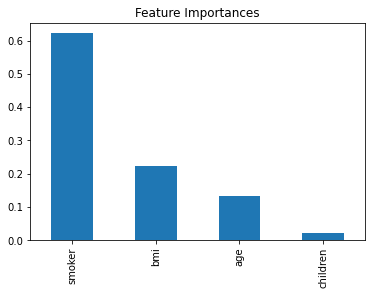

In [1139]:
coef5 = pd.Series(best_model_ab.feature_importances_, x_train.columns).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

In [766]:
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
score = r2_score(y_test , y_pred)
ab_r2=score
Adj_R2=1-((n-1)*(1-score)/(n-k-1))
ab_adjr2=Adj_R2
print("R2 Score : {}".format(score))
print("Adj_R2 : {}".format(Adj_R2))
print("Model Accuracy: {}%".format(score * 100))
mae=mean_absolute_error(y_test,y_pred)
print("mae : {}".format(mae)) # mae = mean(|y_pred - y_test|)
mse =mean_squared_error(y_test,y_pred)
print("mse : {}".format(mse)) # mse = mean[(y_pred - y_test)^2]
import math
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
ab_rmse=rmse
print("rmse : {}".format(rmse))

R2 Score : 0.7839358043398419
Adj_R2 : 0.78064965687733
Model Accuracy: 78.39358043398418%
mae : 2350.1163121604477
mse : 30276826.09321987
rmse : 5502.438195311227


#### INTERPRETATION
R2Score and Adj_R2,which are .78 which shows our model is a good fit for the data and it can accurately predict the independ variable

Overall we have a model with a model accuracy of 78.3% after parameter tuning which is a good score for the model.

We have arrived at a conclusion that our model is a well fitted model for predictiong the insurance charges with the significant variables.

### MODEL COMPARISON

In [1150]:
listmodel=['Linear Regression','KNN','SVR','Decision Tree','RandomForest','ADABOOST']

In [1151]:
LIST_R2=[lr_r2,knn_r2,svr_r2,dt_r2,rf_r2,ab_r2]

In [1152]:
LIST_ADJR2=[lr_adjr2,knn_adjr2,svr_adjr2,dt_adjr2,rf_adjr2,ab_adjr2]

In [1153]:
LIST_RMSE=[lr_rmse,knn_rmse,svr_rmse,dt_rmse,rf_rmse,ab_rmse]

In [1154]:
LIST_ACC=[lr_r2*100,knn_r2*100,svr_r2*100,dt_r2*100,rf_r2*100,ab_r2*100]

In [1155]:
data1 = pd.DataFrame(listmodel, columns=["MODEL"])
data2= pd.DataFrame(LIST_R2, columns=["R2"])
data3=pd.DataFrame(LIST_ADJR2, columns=["ADj_R2"])
data4=pd.DataFrame(LIST_RMSE, columns=["RMSE"])
data5=pd.DataFrame(LIST_ACC, columns=["ACCURACY SCORE"])
data6=pd.concat([data1,data5],axis=1)
model_strength=pd.concat([data1,data2,data3,data4,data5],axis=1)
#print(model_strength)
print(model_strength.sort_values(by=['ACCURACY SCORE'],ascending=False))

               MODEL        R2    ADj_R2         RMSE  ACCURACY SCORE
3      Decision Tree  0.804835  0.801867  5229.551358       80.483528
4       RandomForest  0.803531  0.800543  5246.990876       80.353143
5           ADABOOST  0.783936  0.780650  5502.438195       78.393580
0  Linear Regression  0.718367  0.714083  6282.112469       71.836678
2                SVR  0.504451  0.496914  8333.109220       50.445100
1                KNN  0.370279  0.360701  9393.725740       37.027895


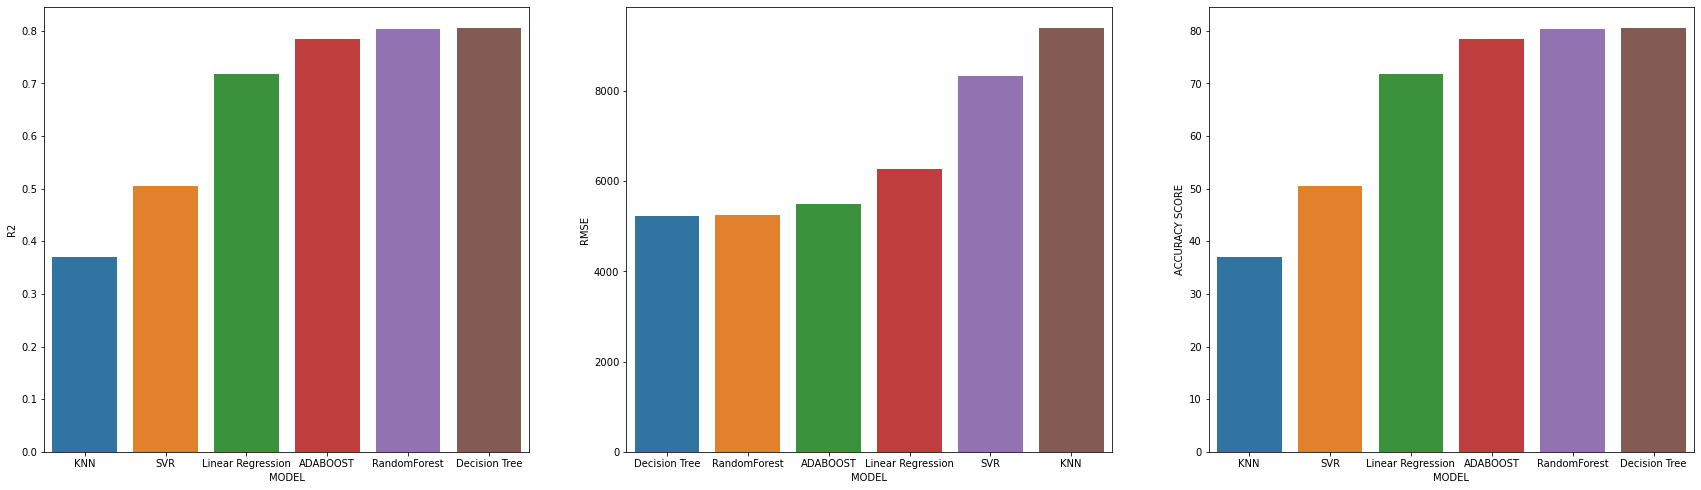

In [1158]:
plt.figure(figsize=(40, 18))
plt.subplot(2,4,1)
sns.barplot(x ='MODEL' , y = 'R2', data = model_strength,order=model_strength.sort_values('R2').MODEL)
plt.subplot(2,4,2)
sns.barplot(x='MODEL',y='RMSE', data = model_strength,order=model_strength.sort_values('RMSE').MODEL)
plt.subplot(2,4,3)
sns.barplot(x='MODEL',y='ACCURACY SCORE', data = model_strength,order=model_strength.sort_values('ACCURACY SCORE').MODEL)

plt.show()

## CONCLUSION

From the above compariosn we can conclude that Random Forest model and decison tree models best fits the best fits the given data to predict the Insurance charges as it has low RMSE and high R2 and accuracy score compared to other models.The model with weakest performance is KNN